In [16]:
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
import os 
import gc
import psutil
from scipy import stats
warnings.filterwarnings("ignore")

In [17]:
InjuryRecord = pd.read_csv("InjuryRecord.csv")
PlayList = pd.read_csv("PlayList.csv")
PlayerTrackData = pd.read_csv("PlayerTrackData.csv")

In [18]:
array_outdoors = ['Outdoor', 'Oudoor', 'Outdoors',
       'Ourdoor', 'Outddors', 'Heinz Field', 'Outdor', 'Outside', 'Cloudy']
array_indoors = ['Indoors', 'Indoor', 'Indoor', 'Retractable Roof']
array_open = ['Open','Outdoor Retr Roof-Open', 'Retr. Roof-Open', 'Indoor, Open Roof',
       'Domed, Open', 'Domed, open', 'Retr. Roof - Open']
array_closed = ['Closed Dome', 'Domed, closed', 'Dome', 'Domed',
       'Retr. Roof-Closed', 'Outdoor Retr Roof-Open', 'Retractable Roof', 'Indoor, Roof Closed', 'Retr. Roof - Closed', 'Bowl', 'Dome, closed',
       'Retr. Roof Closed']

PlayList['StadiumType'] = PlayList['StadiumType'].replace(array_outdoors, 'Outdoors')
PlayList['StadiumType'] = PlayList['StadiumType'].replace(array_indoors, 'Indoors')
PlayList['StadiumType'] = PlayList['StadiumType'].replace(array_open, 'Open')
PlayList['StadiumType'] = PlayList['StadiumType'].replace(array_closed, 'Closed')

In [19]:
array_clear = ['Clear and warm', 'Sunny', 'Clear',
       'Sunny and warm', 'Clear and Cool',
       'Clear and cold', 'Sunny and cold', 'Partly Sunny',
       'Mostly Sunny', 'Clear Skies', 'Partly sunny', 
       'Sunny and clear', 'Clear skies',
       'Sunny Skies', 'Fair', 'Partly clear', 
       'Heat Index 95', 'Sunny, highs to upper 80s', 
       'Mostly sunny', 'Sunny, Windy', 'Mostly Sunny Skies', 
       'Clear and Sunny', 'Clear and sunny',
       'Clear to Partly Cloudy', 'Cold']

array_cloudy = ['Mostly Cloudy', 'Cloudy',
       'Cloudy, fog started developing in 2nd quarter',
       'Partly Cloudy', 'Mostly cloudy', 'Cloudy and cold',
       'Cloudy and Cool', 'Partly cloudy', 
       'Party Cloudy', 'Hazy', 'Partly Clouidy',
       'Overcast', 'Cloudy, 50% change of rain',
       'Mostly Coudy', 'Cloudy, chance of rain',
       'Sun & clouds', 'Cloudy, Rain',
       'cloudy', 'Coudy']

array_indoors = ['Controlled Climate','Indoor',
       'N/A (Indoors)', 'Indoors', 'N/A Indoor']

array_precip = ['Rain',
       'Snow',
       'Scattered Showers',
       'Light Rain',
       'Heavy lake effect snow', 'Cloudy, Rain',
       'Rainy',
       'Cloudy, light snow accumulating 1-3"',
       'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
       'Rain shower', 'Rain likely, temps in low 40s.', 'Rain Chance 40%', 'Rain likely, temps in low 40s.',
       'Cloudy, 50% change of rain', '10% Chance of Rain', 'Showers', '30% Chance of Rain']

PlayList['Weather'] = PlayList['Weather'].replace(array_clear, 'Clear')
PlayList['Weather'] = PlayList['Weather'].replace(array_cloudy, 'Cloudy')
PlayList['Weather'] = PlayList['Weather'].replace(array_indoors, 'Indoors')
PlayList['Weather'] = PlayList['Weather'].replace(array_precip, 'Precipitation')

In [20]:
total = pd.merge(PlayList, InjuryRecord, on='PlayKey',how='left')

In [21]:
final = pd.merge(total, PlayerTrackData, on='PlayKey',how='left')
final['DM_M1'] = final['DM_M1'].fillna(0).astype(int)
final['DM_M7'] = final['DM_M7'].fillna(0).astype(int)
final['DM_M28'] = final['DM_M28'].fillna(0).astype(int)
final['DM_M42'] = final['DM_M42'].fillna(0).astype(int)

In [22]:
injury = pd.merge(InjuryRecord, PlayList, on='PlayKey',how='inner')

In [23]:
injured = pd.merge(injury, PlayerTrackData, on='PlayKey',how='inner')

In [24]:
injury_rate = injured['FieldType'].value_counts()/final['FieldType'].value_counts() 

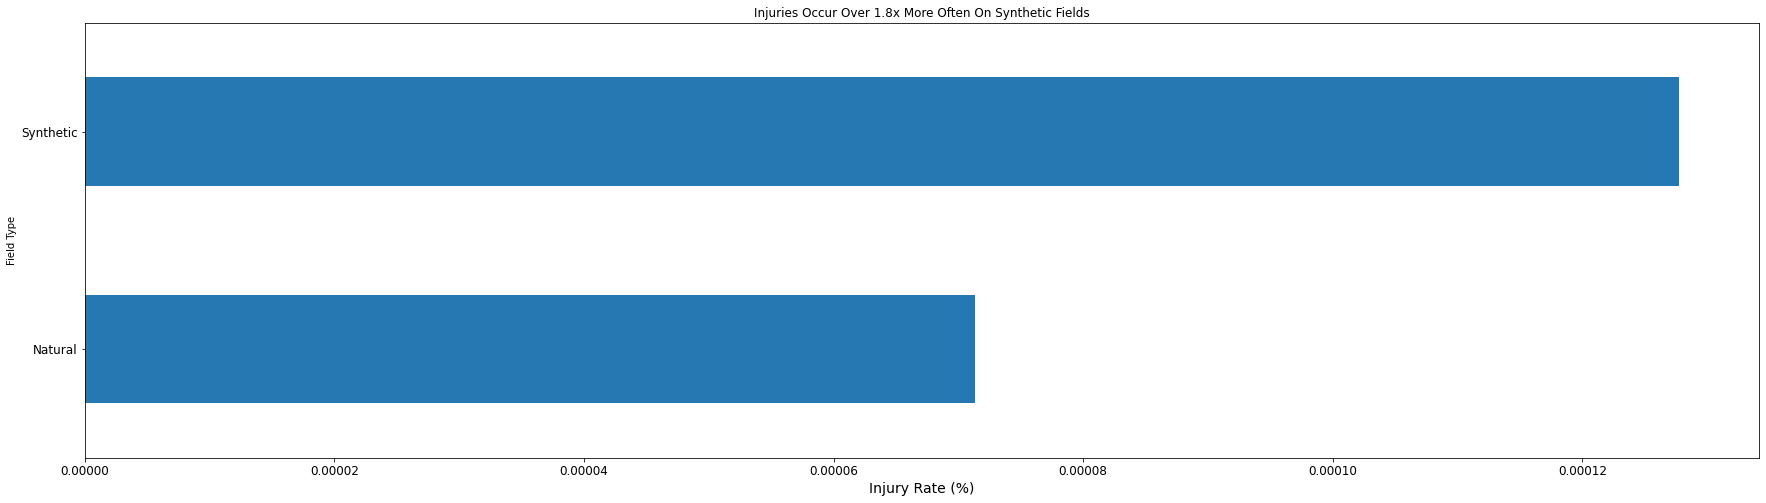

<Figure size 432x288 with 0 Axes>

In [32]:
ax = injury_rate.plot(title='Injuries Occur Over 1.8x More Often On Synthetic Fields', 
                      kind='barh', figsize=(12,8), color='#2678B2', fontsize=12)
vals = ax.get_xticks()
ax.xaxis.label.set_size(14)
ax = plt.xlabel('Injury Rate (%)')
ax = plt.ylabel('Field Type')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('graphs/Surface-distribution.png', dpi=100)

In [26]:
injured_syn = injured[injured['Surface']=='Synthetic']
injured_nat = injured[injured['Surface']=='Natural']

In [27]:
inj_s_syn = injured_syn.groupby('PlayKey', as_index=False)['s'].max()
inj_s_nat = injured_nat.groupby('PlayKey', as_index=False)['s'].max()


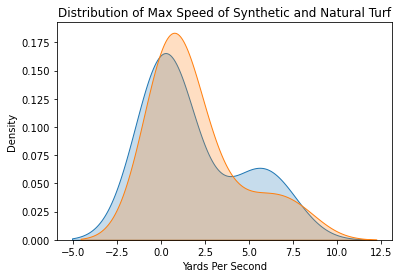

<Figure size 432x288 with 0 Axes>

In [28]:
ax = sns.kdeplot(data=inj_s_syn ['s'], label='Synthetic', shade=True)
ax = sns.kdeplot(data=inj_s_nat['s'], label='Natural', shade=True)
ax = plt.title("Distribution of Max Speed of Synthetic and Natural Turf")
ax = plt.xlabel('Yards Per Second')
ax = plt.ylabel('Density')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('graphs/Distribution of Max Speed.png', dpi=100)

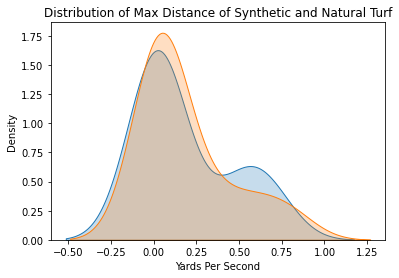

In [29]:
inj_dis_syn = injured_syn.groupby('PlayKey', as_index=False)['dis'].max()
inj_dis_nat = injured_nat.groupby('PlayKey', as_index=False)['dis'].max()
ax = sns.kdeplot(data=inj_dis_syn ['dis'], label='Synthetic', shade=True)
ax = sns.kdeplot(data=inj_dis_nat['dis'], label='Natural', shade=True)
ax = plt.title("Distribution of Max Distance of Synthetic and Natural Turf")
ax = plt.xlabel('Yards Per Second')
ax = plt.ylabel('Density')

The difference in the number of plays until injury on synthetic and natural turf is not statistically significant.
p-value: 0.638534


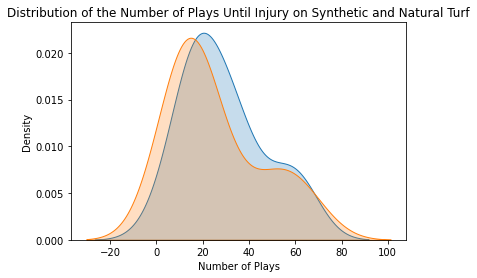

<Figure size 432x288 with 0 Axes>

In [30]:
ax = sns.kdeplot(data=injured_syn ['PlayerGamePlay'], label='Synthetic', shade=True)
ax = sns.kdeplot(data=injured_nat['PlayerGamePlay'], label='Natural', shade=True)
ax = plt.title("Distribution of the Number of Plays Until Injury on Synthetic and Natural Turf")
ax = plt.xlabel('Number of Plays')
ax = plt.ylabel('Density')
ttest = stats.ttest_ind(injured_syn['PlayerGamePlay'], injured_nat['PlayerGamePlay'], equal_var = False)
if ttest.pvalue < .05:
    print('The difference in the number of plays until injury on synthetic and natural turf is statistically significant.')
else:
    print('The difference in the number of plays until injury on synthetic and natural turf is not statistically significant.')
print('p-value:', '%f' % ttest.pvalue)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('graphs/Distribution of the Number of Plays Until Injury.png', dpi=100)

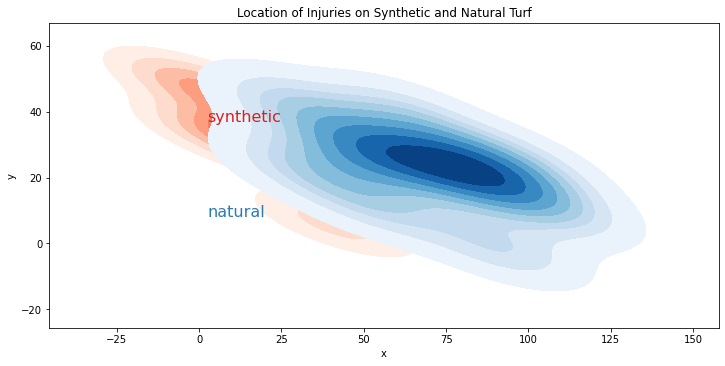

In [31]:
# Subset the injured dataset by surface
synthetic = injured.query("Surface == 'Synthetic'")
natural = injured.query("Surface == 'Natural'")

# Set up the figure
f, ax = plt.subplots(figsize=(12, 10))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(synthetic.x, synthetic.y,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(natural.x, natural.y,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "natural", size=16, color=blue)
ax.text(2.5, 37, "synthetic", size=16, color=red)
ax = plt.title("Location of Injuries on Synthetic and Natural Turf")